In [1]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint 
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras import initializers
import numpy as np
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Cargo Data

In [3]:
folder = '/kaggle/input/fashion-mnist-itba-lab-2020/'
x = np.load(folder+'train_images.npy')
y = np.loadtxt(folder+'train_labels.csv', delimiter=',', skiprows=1)
x_test = np.load(folder+'test_images.npy')

In [4]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.1)

In [5]:
x_train=x_train/255.0
x_valid=x_valid/255.0


In [6]:
#from scipy import stats

#zscore_df = stats.zscore(x_train, axis=1)
#print (zscore_df)


In [7]:
y_train_categorical = to_categorical(y_train)
y_val_categorical = to_categorical(y_valid)

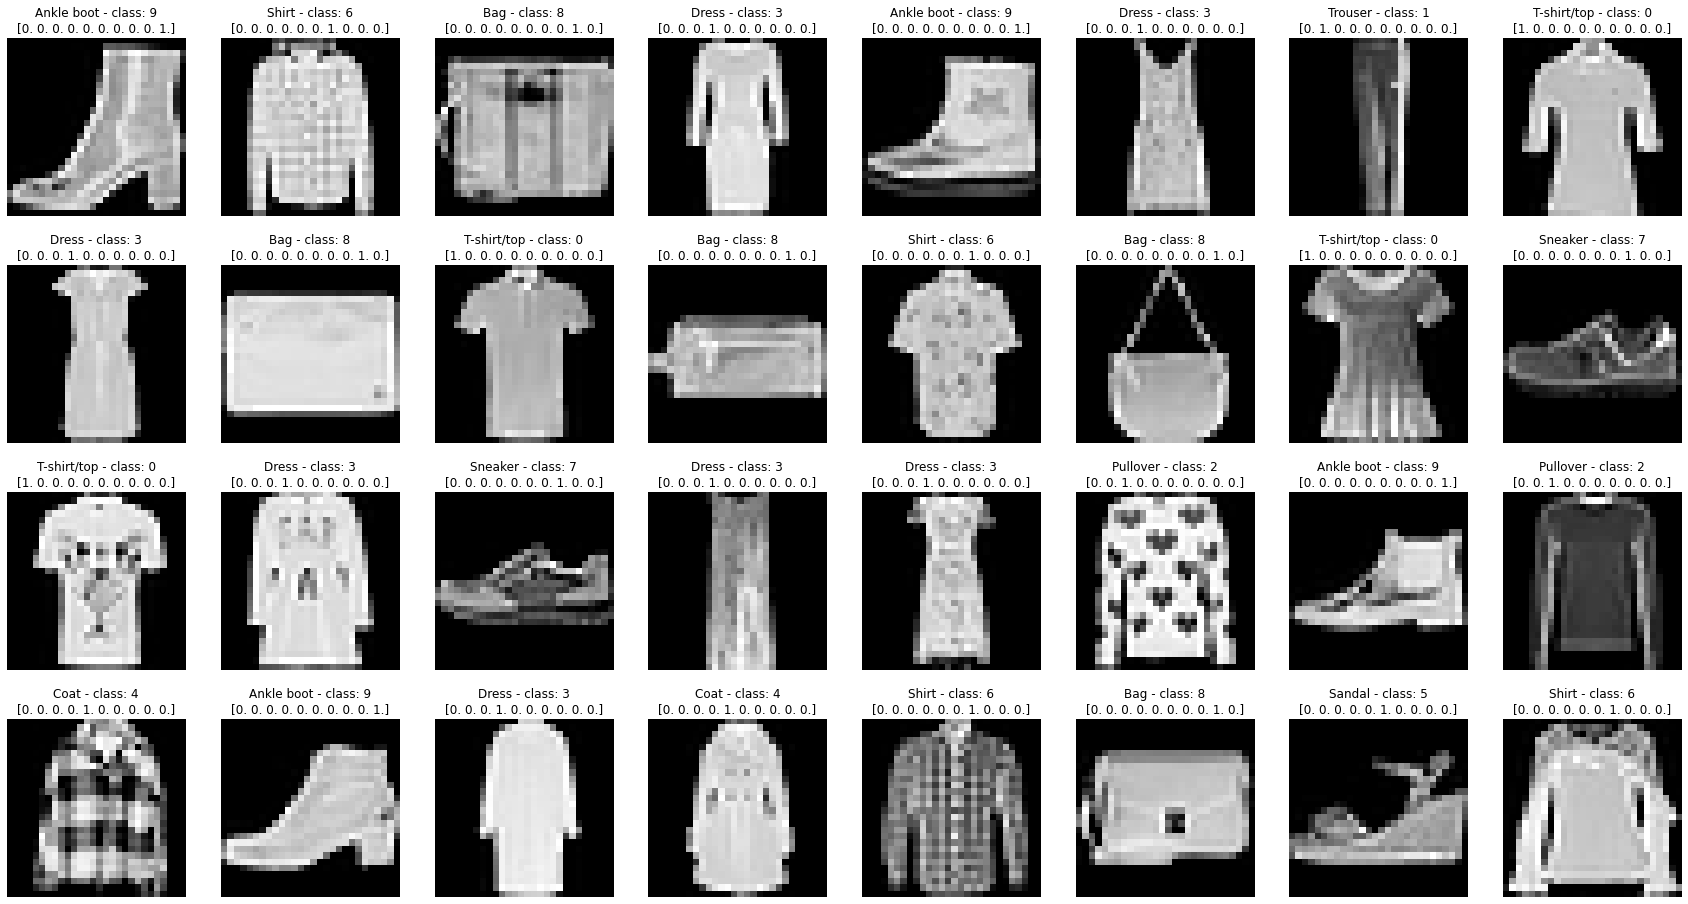

In [8]:
alto = 4
ancho = 8
f, axs = plt.subplots(alto, ancho, figsize=(30,4*alto))
axs = axs.reshape(-1)
for i in range(alto*ancho):
    axs[i].imshow(x_train[i], cmap='gray')
    axs[i].set_title(f'{classes[int(y_train[i])]} - class: {int(y_train[i])}\n{y_train_categorical[i]}')
    axs[i].axis('off')

In [9]:
output_size = 10
model_single_layer = Sequential()
model_single_layer.add(Flatten(input_shape=x_train.shape[1:]))
model_single_layer.add(Dense(50, name='Oculta_1', activation='relu'))
model_single_layer.add(Dense(30, name='Oculta', activation='relu'))
model_single_layer.add(Dense(output_size, name='Salida'))
model_single_layer.add(Activation('softmax'))
model_single_layer.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
Oculta_1 (Dense)             (None, 50)                39250     
_________________________________________________________________
Oculta (Dense)               (None, 30)                1530      
_________________________________________________________________
Salida (Dense)               (None, 10)                310       
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 41,090
Trainable params: 41,090
Non-trainable params: 0
_________________________________________________________________


In [10]:
lr = 0.00001 
SGD = optimizers.Adam(lr=lr)
model_single_layer.compile(loss = 'categorical_crossentropy', optimizer=SGD, metrics=['accuracy'])

In [11]:
batch_size = 128
model_single_layer.fit(x_train, 
                       y_train_categorical,
                       epochs=500, batch_size=batch_size, 
                       verbose=1, 
                       validation_data = (x_valid, y_val_categorical)
                      )

Train on 54000 samples, validate on 6000 samples
Epoch 1/500
54000/54000 [==============================] - 2s 40us/step - loss: 2.1854 - accuracy: 0.1440 - val_loss: 1.9954 - val_accuracy: 0.2647
Epoch 2/500
54000/54000 [==============================] - 1s 25us/step - loss: 1.8479 - accuracy: 0.3874 - val_loss: 1.6995 - val_accuracy: 0.4995
Epoch 3/500
54000/54000 [==============================] - 1s 25us/step - loss: 1.5833 - accuracy: 0.5489 - val_loss: 1.4635 - val_accuracy: 0.5888
Epoch 4/500
54000/54000 [==============================] - 1s 25us/step - loss: 1.3654 - accuracy: 0.6198 - val_loss: 1.2729 - val_accuracy: 0.6412
Epoch 5/500
54000/54000 [==============================] - 1s 27us/step - loss: 1.2035 - accuracy: 0.6501 - val_loss: 1.1350 - val_accuracy: 0.6592
Epoch 6/500
54000/54000 [==============================] - 1s 25us/step - loss: 1.0843 - accuracy: 0.6709 - val_loss: 1.0338 - val_accuracy: 0.6790
Epoch 7/500
54000/54000 [==============================] - 1s 2

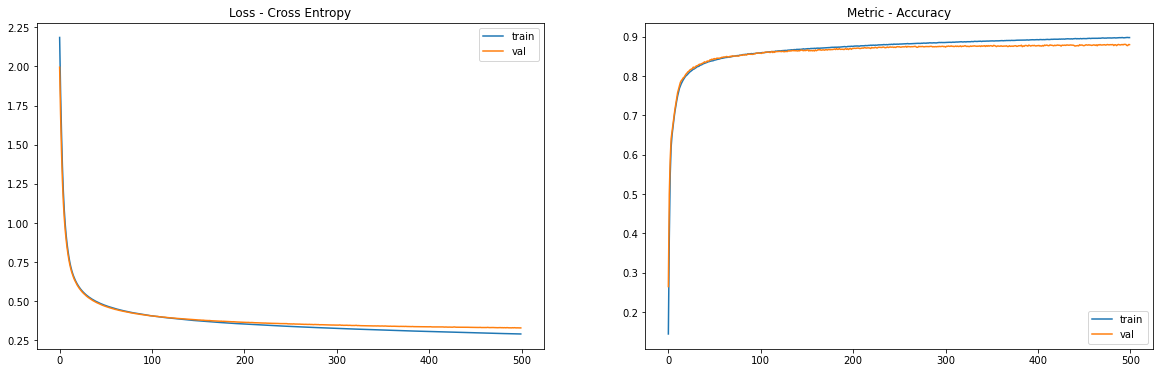

In [12]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
ax1.plot(model_single_layer.history.history['loss'], label='train')
ax1.plot(model_single_layer.history.history['val_loss'], label='val')
ax1.set_title('Loss - Cross Entropy')
ax1.legend()
ax2.plot(model_single_layer.history.history['accuracy'], label='train')
ax2.plot(model_single_layer.history.history['val_accuracy'], label='val')
ax2.set_title('Metric - Accuracy')
ax2.legend()
plt.show()

In [13]:
loss, acc = model_single_layer.evaluate(x_valid, y_val_categorical, verbose=0)
print(acc, loss)

0.8803333044052124 0.32983392870426176


In [14]:
# Calculo probabilidades de cada clase para cada observación
x_test=x_test/255
test_prediction = model_single_layer.predict(x_test)
print(test_prediction.shape)

(10000, 10)


In [15]:
# Calculo clase
test_labels = np.argmax(test_prediction, axis = 1)
print(test_labels)

[3 2 7 ... 2 3 7]


# Armo CSV para submitear

In [16]:
import pandas
df = pandas.DataFrame(data={"Category": test_labels}).astype(int)
df.to_csv("./submission.csv", sep=',',index=True,  index_label='Id')